In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.metrics import accuracy_score

# New section

Data Collection and analysis


In [ ]:
parkinsons_data = pd.read_csv('/content/parkinsons.data')

In [ ]:
# printing first 5 rows  
parkinsons_data.head()

,name,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,...,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
0,phon_R01_S01_1,119.992,157.302,74.997,0.00784,0.00007,0.00370,0.00554,0.01109,0.04374,...,0.06545,0.02211,21.033,1,0.414783,0.815285,-4.813031,0.266482,2.301442,0.284654
1,phon_R01_S01_2,122.400,148.650,113.819,0.00968,0.00008,0.00465,0.00696,0.01394,0.06134,...,0.09403,0.01929,19.085,1,0.458359,0.819521,-4.075192,0.335590,2.486855,0.368674
2,phon_R01_S01_3,116.682,131.111,111.555,0.01050,0.00009,0.00544,0.00781,0.01633,0.05233,...,0.08270,0.01309,20.651,1,0.429895,0.825288,-4.443179,0.311173,2.342259,0.332634
3,phon_R01_S01_4,116.676,137.871,111.366,0.00997,0.00009,0.00502,0.00698,0.01505,0.05492,...,0.08771,0.01353,20.644,1,0.434969,0.819235,-4.117501,0.334147,2.405554,0.368975
4,phon_R01_S01_5,116.014,141.781,110.655,0.01284,0.00011,0.00655,0.00908,0.01966,0.06425,...,0.10470,0.01767,19.649,1,0.417356,0.823484,-3.747787,0.234513,2.332180,0.410335


In [ ]:
parkinsons_data.shape

(195, 24)

In [ ]:
parkinsons_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   name              195 non-null    object 
 1   MDVP:Fo(Hz)       195 non-null    float64
 2   MDVP:Fhi(Hz)      195 non-null    float64
 3   MDVP:Flo(Hz)      195 non-null    float64
 4   MDVP:Jitter(%)    195 non-null    float64
 5   MDVP:Jitter(Abs)  195 non-null    float64
 6   MDVP:RAP          195 non-null    float64
 7   MDVP:PPQ          195 non-null    float64
 8   Jitter:DDP        195 non-null    float64
 9   MDVP:Shimmer      195 non-null    float64
 10  MDVP:Shimmer(dB)  195 non-null    float64
 11  Shimmer:APQ3      195 non-null    float64
 12  Shimmer:APQ5      195 non-null    float64
 13  MDVP:APQ          195 non-null    float64
 14  Shimmer:DDA       195 non-null    float64
 15  NHR               195 non-null    float64
 16  HNR               195 non-null    float64
 1

In [ ]:
parkinsons_data.isnull().sum()

name                0
MDVP:Fo(Hz)         0
MDVP:Fhi(Hz)        0
MDVP:Flo(Hz)        0
MDVP:Jitter(%)      0
MDVP:Jitter(Abs)    0
MDVP:RAP            0
MDVP:PPQ            0
Jitter:DDP          0
MDVP:Shimmer        0
MDVP:Shimmer(dB)    0
Shimmer:APQ3        0
Shimmer:APQ5        0
MDVP:APQ            0
Shimmer:DDA         0
NHR                 0
HNR                 0
status              0
RPDE                0
DFA                 0
spread1             0
spread2             0
D2                  0
PPE                 0
dtype: int64

In [ ]:
parkinsons_data.describe()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),Shimmer:APQ3,Shimmer:APQ5,MDVP:APQ,Shimmer:DDA,NHR,HNR,status,RPDE,DFA,spread1,spread2,D2,PPE
count,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000,195.000000
mean,154.228641,197.104918,116.324631,0.006220,0.000044,0.003306,0.003446,0.009920,0.029709,0.282251,0.015664,0.017878,0.024081,0.046993,0.024847,21.885974,0.753846,0.498536,0.718099,-5.684397,0.226510,2.381826,0.206552
std,41.390065,91.491548,43.521413,0.004848,0.000035,0.002968,0.002759,0.008903,0.018857,0.194877,0.010153,0.012024,0.016947,0.030459,0.040418,4.425764,0.431878,0.103942,0.055336,1.090208,0.083406,0.382799,0.090119
min,88.333000,102.145000,65.476000,0.001680,0.000007,0.000680,0.000920,0.002040,0.009540,0.085000,0.004550,0.005700,0.007190,0.013640,0.000650,8.441000,0.000000,0.256570,0.574282,-7.964984,0.006274,1.423287,0.044539
25%,117.572000,134.862500,84.291000,0.003460,0.000020,0.001660,0.001860,0.004985,0.016505,0.148500,0.008245,0.009580,0.013080,0.024735,0.005925,19.198000,1.000000,0.421306,0.674758,-6.450096,0.174351,2.099125,0.137451
50%,148.790000,175.829000,104.315000,0.004940,0.000030,0.002500,0.002690,0.007490,0.022970,0.221000,0.012790,0.013470,0.018260,0.038360,0.011660,22.085000,1.000000,0.495954,0.722254,-5.720868,0.218885,2.361532,0.194052
75%,182.769000,224.205500,140.018500,0.007365,0.000060,0.003835,0.003955,0.011505,0.037885,0.350000,0.020265,0.022380,0.029400,0.060795,0.025640,25.075500,1.000000,0.587562,0.761881,-5.046192,0.279234,2.636456,0.252980
max,260.105000,592.030000,239.170000,0.033160,0.000260,0.021440,0.019580,0.064330,0.119080,1.302000,0.056470,0.079400,0.137780,0.169420,0.314820,33.047000,1.000000,0.685151,0.825288,-2.434031,0.450493,3.671155,0.527367


In [ ]:
parkinsons_data['status'].value_counts()

1    147
0     48
Name: status, dtype: int64

0 - No PD 

1 - Yes PD

In [ ]:
parkinsons_data.groupby('status').mean()

,MDVP:Fo(Hz),MDVP:Fhi(Hz),MDVP:Flo(Hz),MDVP:Jitter(%),MDVP:Jitter(Abs),MDVP:RAP,MDVP:PPQ,Jitter:DDP,MDVP:Shimmer,MDVP:Shimmer(dB),...,MDVP:APQ,Shimmer:DDA,NHR,HNR,RPDE,DFA,spread1,spread2,D2,PPE
status,,,,,,,,,,,,,,,,,,,,,
0,181.937771,223.636750,145.207292,0.003866,0.000023,0.001925,0.002056,0.005776,0.017615,0.162958,...,0.013305,0.028511,0.011483,24.678750,0.442552,0.695716,-6.759264,0.160292,2.154491,0.123017
1,145.180762,188.441463,106.893558,0.006989,0.000051,0.003757,0.003900,0.011273,0.033658,0.321204,...,0.027600,0.053027,0.029211,20.974048,0.516816,0.725408,-5.333420,0.248133,2.456058,0.233828


Data Pre-Processing

Separating features and target


In [ ]:
X = parkinsons_data.drop(columns=['name','status'], axis=1)
Y = parkinsons_data['status']

In [ ]:
print(X)

     MDVP:Fo(Hz)  MDVP:Fhi(Hz)  MDVP:Flo(Hz)  MDVP:Jitter(%)  \
0        119.992       157.302        74.997         0.00784   
1        122.400       148.650       113.819         0.00968   
2        116.682       131.111       111.555         0.01050   
3        116.676       137.871       111.366         0.00997   
4        116.014       141.781       110.655         0.01284   
..           ...           ...           ...             ...   
190      174.188       230.978        94.261         0.00459   
191      209.516       253.017        89.488         0.00564   
192      174.688       240.005        74.287         0.01360   
193      198.764       396.961        74.904         0.00740   
194      214.289       260.277        77.973         0.00567   

     MDVP:Jitter(Abs)  MDVP:RAP  MDVP:PPQ  Jitter:DDP  MDVP:Shimmer  \
0             0.00007   0.00370   0.00554     0.01109       0.04374   
1             0.00008   0.00465   0.00696     0.01394       0.06134   
2             0.00

In [ ]:
print(Y)

0      1
1      1
2      1
3      1
4      1
      ..
190    0
191    0
192    0
193    0
194    0
Name: status, Length: 195, dtype: int64


Spliting into Train data & Test data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(195, 22) (156, 22) (39, 22)


Data Standardization


In [ ]:
scaler = StandardScaler()

In [ ]:
scaler.fit(X_train)

StandardScaler()

In [ ]:
X_train = scaler.transform(X_train)

X_test = scaler.transform(X_test)

In [ ]:
print(X_train)

[[ 0.63239631 -0.02731081 -0.87985049 ... -0.97586547 -0.55160318
   0.07769494]
 [-1.05512719 -0.83337041 -0.9284778  ...  0.3981808  -0.61014073
   0.39291782]
 [ 0.02996187 -0.29531068 -1.12211107 ... -0.43937044 -0.62849605
  -0.50948408]
 ...
 [-0.9096785  -0.6637302  -0.160638   ...  1.22001022 -0.47404629
  -0.2159482 ]
 [-0.35977689  0.19731822 -0.79063679 ... -0.17896029 -0.47272835
   0.28181221]
 [ 1.01957066  0.19922317 -0.61914972 ... -0.716232    1.23632066
  -0.05829386]]


Training Support Vector Machine Model

In [ ]:
model = svm.SVC(kernel='linear')

In [ ]:
# training the SVM model with training data
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [ ]:
model3 = svm.SVC(kernel='linear')
# training the SVM model with testing data
model3.fit(X_test, Y_test)

SVC(kernel='linear')

In [ ]:
from sklearn.ensemble import RandomForestRegressor

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
model2 = RandomForestRegressor(random_state=1, max_depth=10)
model2.fit(X_train, Y_train)

RandomForestRegressor(max_depth=10, random_state=1)

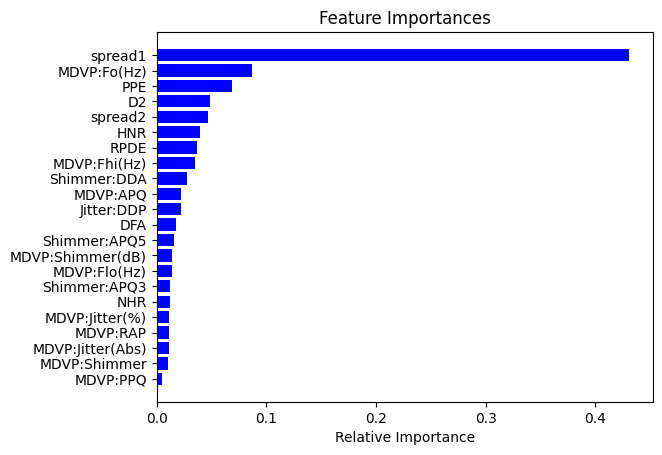

In [ ]:
features = X.columns
importance = model2.feature_importances_
indices = np.argsort(importance)[0:]  # top 10 features
plt.title('Feature Importances')
plt.barh(range(len(indices)), importance[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

Model Evaluation

Accuracy score

In [ ]:
# accuracy score on training data
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)

In [ ]:
print('Accuracy score of training data : ', training_data_accuracy)

Accuracy score of training data :  0.8846153846153846


In [ ]:
# accuracy score on test data
X_test_prediction = model.predict(X_test)
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)

In [ ]:
print('Accuracy score of test data : ', test_data_accuracy)

Accuracy score of test data :  0.8717948717948718



 Validation

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier

In [ ]:
svm=cross_val_score(SVC(),X_train,Y_train)
print('svm',svm,svm.mean())

svm [0.84375    0.83870968 0.90322581 0.83870968 0.87096774] 0.8590725806451613


In [ ]:
#DecisionTreeClassifier
dtc=cross_val_score(DecisionTreeClassifier(),X_train,Y_train)
print('dtc',dtc,dtc.mean())

dtc [0.9375     0.77419355 0.90322581 0.77419355 0.90322581] 0.8584677419354838


In [ ]:
adb=cross_val_score(AdaBoostClassifier(),X_train,Y_train)
print('adb',adb,adb.mean())

adb [0.84375    0.87096774 0.87096774 0.80645161 0.80645161] 0.839717741935484


In [ ]:
lr=cross_val_score(LogisticRegression(),X_train,Y_train)
print('log reg',lr,lr.mean())

log reg [0.78125    0.83870968 0.87096774 0.80645161 0.83870968] 0.827217741935484


In [ ]:
import matplotlib.pyplot as plt


In [ ]:
x=['svm','dtc','adb','lr']

y=[svm.mean(), dtc.mean(), adb.mean(),  lr.mean()]

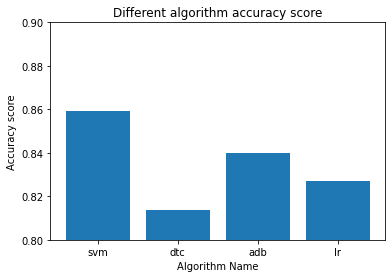

In [ ]:
plt.bar(x,y)
plt.xlabel('Algorithm Name')
plt.ylabel("Accuracy score")
plt.title('Different algorithm accuracy score')
plt.ylim(0.80, 0.90)
plt.show()

Building a Diagnosis System

In [ ]:
# train dataset
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
#test data
input_data = (197.07600,206.89600,192.05500,0.00289,0.00001,0.00166,0.00168,0.00498,0.01098,0.09700,0.00563,0.00680,0.00802,0.01689,0.00339,26.77500,0.422229,0.741367,-7.348300,0.177551,1.743867,0.085569)

# changing input data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardize the data
std_data = scaler.transform(input_data_reshaped)

prediction = model3.predict(std_data)
print(prediction)


if (prediction[0] == 0):
  print("The Person does not have Parkinsons Disease")

else:
  print("The Person has Parkinsons")


[0]
The Person does not have Parkinsons Disease


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  "X does not have valid feature names, but"


[[ 5  3]
 [ 2 29]]


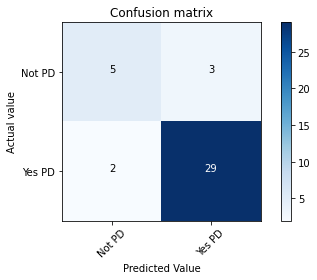

In [ ]:

from sklearn.metrics import plot_confusion_matrix, confusion_matrix
import matplotlib.pyplot as plt
import itertools

y_prediction = model.predict(X_test) #prediction

#Evaluation of Model - Confusion Matrix Plot
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    
    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('Actual value')
    plt.xlabel('Predicted Value')
    plt.tight_layout()


# Compute confusion matrix
cnf_matrix = confusion_matrix(Y_test, y_prediction)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Not PD','Yes PD'],
                      title='Confusion matrix')

In [ ]:
tn, fp, fn, tp = confusion_matrix(Y_test, y_prediction).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  5
False Positives:  3
False Negatives:  2
True Positives:  29


In [ ]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy")
print(Accuracy)

Accuracy
87.17948717948718


In [ ]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision")
print(Precision)


Precision
0.90625


Deployment

In [ ]:
import pickle
# Writing different model files to file
with open( 'modelForPrediction.sav', 'wb') as f:
    pickle.dump(model,f)

with open('standardScalar.sav', 'wb') as f:
    pickle.dump(scaler,f)